<a href="https://colab.research.google.com/github/ashwantmanikoth/ML_WorkFlow/blob/main/Assignment_2_HuggingFace_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers
!pip install datasets
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision.models import resnet18
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoFeatureExtractor, AutoModelForImageClassification


In [ ]:
from transformers.models.convnext.image_processing_convnext import ConvNextImageProcessor
from datasets import load_dataset
# Load model directly
dataset = load_dataset("cats_vs_dogs")

extractor = ConvNextImageProcessor.from_pretrained("akahana/vit-base-cats-vs-dogs")
model = AutoModelForImageClassification.from_pretrained("akahana/vit-base-cats-vs-dogs")


Confusion Matrix:
[[6]]


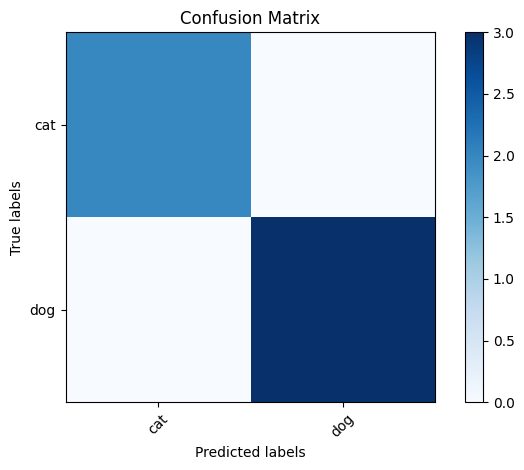

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# data_loader = torch.utils.data.DataLoader(ImageFolder(dataset["train"]["image"]), batch_size=5, shuffle=False)

import random


from PIL import Image

y_true = []
y_pred = []
trained_data = dataset['train']
truelabel=[]

num_random_data_points = 5  # Change this to the desired number

random_indices = random.sample(range(len(trained_data)), num_random_data_points)

for i in random_indices:
  data = trained_data[i]
  image= data['image']
  labels = data['labels']

  inputs = extractor(image,return_tensors="pt",padding="True")  # Assuming 'images' is the input image

  # Make predictions
  with torch.no_grad():
    logits = model(**inputs).logits
    predicted_class = torch.argmax(logits, dim=1).cpu().numpy()
    truelabel.append(labels)
  y_pred.extend(predicted_class)
y_true.extend(truelabel)


# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(confusion_mat)
class_names =['cat','dog']

# Plot the confusion matrix
# plt.figure(figsize=(5, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.tight_layout()
# Show the confusion m  atrix plot
plt.show()